<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Statistical Machine Learning - Notebook 4, version for students
**Author: Michał Ciach, Dorota Celińska-Kopczyńska** /Modyfikacje 2025 BW/


## Description

In this notebook, we will learn a basic technique of exploratory statistics called *clustering*, which is a method of partitioning a set of points into groups. It's an example of an *unsupervised learning* algorithm - it's task is to identify interesting patterns in the data, as opposed to *supervised learning* algorithms, which are used to predict features of new data points based on previous examples.   

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/SLINK-density-data.svg/800px-SLINK-density-data.svg.png' height="400">

*An example of a clustered data set. Clusters of points are labeled with different colors.   
Source: https://commons.wikimedia.org/wiki/File:SLINK-density-data.svg*
</center>



There are many different clustering algorithms. One of the reasons for this is that clustering is not a well-defined problem. There is not a single function that needs to be optimized, like in mathematical analysis. Instead, clustering is supposed to reflect our intuitions about the structure of the data, and to be useful in a particular application. As a consequence, each clustering algorithm solves its own optimization problem, and has its advantages and disadvantages when it comes to solving real-life problems.  

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/SLINK-Gaussian-data.svg/800px-SLINK-Gaussian-data.svg.png' height="400">

*A less trivial example.   
Source: https://commons.wikimedia.org/wiki/File:SLINK-Gaussian-data.svg*
</center>

In this class, we will learn how to use two popular clustering methods: the *k-means* algorithm and the *hierarchical clustering*. However, before we can use them, we need to learn the basic methods of data pre-processing.

Run the cell below to load the required data sets to the notebook's environment.

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=11QTerXcrZpMGZW64PMIbjIJIJRnQZgYI
!gdown https://drive.google.com/uc?id=1o1_E51w9kSHCm8gKm2T8OzajlM1ALFtn
!gdown https://drive.google.com/uc?id=1aghhMK8w0g1JCAHxYRao7knlMUdMRvPr

Downloading...
From: https://drive.google.com/uc?id=11QTerXcrZpMGZW64PMIbjIJIJRnQZgYI
To: /content/14. BDL municipality area km2 2015-2020.csv
100% 180k/180k [00:00<00:00, 5.22MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o1_E51w9kSHCm8gKm2T8OzajlM1ALFtn
To: /content/14. BDL municipality incomes 2015-2020.csv
100% 228k/228k [00:00<00:00, 4.76MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aghhMK8w0g1JCAHxYRao7knlMUdMRvPr
To: /content/14. BDL municipality population 2015-2020.csv
100% 222k/222k [00:00<00:00, 5.29MB/s]


## Importing Python libraries & loading the data

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
## Import of data pt 1
income = pd.read_csv('14. BDL municipality incomes 2015-2020.csv', sep=';', dtype={'Code': 'str'})
area = pd.read_csv('14. BDL municipality area km2 2015-2020.csv', sep='\t', dtype={'Code': 'str'})
population = pd.read_csv('14. BDL municipality population 2015-2020.csv', sep='\t', dtype={'Code': 'str'})

In [5]:
## import of datasets pt 2
from sklearn import datasets
iris_raw = datasets.load_iris()
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
iris['Species'] = [iris_raw.target_names[x] for x in iris_raw.target]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data preprocessing

**Exercise 0.** Create a data frame `joint` by merging `income`, `area`, and `population` datasets. Use `Code` and `Region` as the key for merging. Inspect the dataset for the needs of the further clustering analysis. Are there any missing data?

In [6]:
# Put your code here
joint=pd.merge(income,area,on=["Code","Region"],suffixes=["income",""])
joint=pd.merge(joint,population,on=["Code","Region"],suffixes=["area","pop"])
# print(joint)
# print(joint.head())
# print(joint.isnull().sum())
print(joint.isna().sum())
print(joint.isnull())

Code           0
Region         0
2015income    31
2016income    31
2017income    31
2018income    31
2019income    32
2020income    32
2015area      31
2016area      31
2017area      31
2018area      31
2019area      32
2020area      32
2015pop       31
2016pop       31
2017pop       31
2018pop       31
2019pop       32
2020pop       32
dtype: int64
       Code  Region  2015income  2016income  2017income  2018income  \
0     False   False       False       False       False       False   
1     False   False       False       False       False       False   
2     False   False       False       False       False       False   
3     False   False       False       False       False       False   
4     False   False       False       False       False       False   
...     ...     ...         ...         ...         ...         ...   
2504  False   False       False       False       False       False   
2505  False   False       False       False       False       False   
2506  Fa

**Exercise 0.1**. Construct a data frame called `two_features` with two columns from the `joint` data frame: `2020 area`, `2020 income`. Remove rows containing missing values using the `pd.dropna()` function. Perform a log-10 transformation and store the results in a `two_features_log10` data frame.  
Visualize the relation between area and income on a scatter plot.

In [7]:
# Put your code here
two_features=joint[["2020area","2020income"]]
two_features=two_features.dropna()
two_features_log10=np.log10(two_features)
two_features_log10

,2020area,2020income
0,1.380211,8.056357
1,2.460898,7.632345
2,2.428135,7.440034
3,2.245513,7.523995
4,2.640481,7.395205
...,...,...
2504,2.454845,7.288166
2505,2.408240,7.398625
2506,1.991226,8.584410
2507,2.478566,9.240303


In [8]:
fig = px.scatter(two_features_log10, x='2020area', y='2020income')
fig.show()


In [33]:
# Put your code here
three_features=joint[["2020area","2020income","2020pop"]]
three_features=three_features.dropna()
three_features_log10=np.log10(three_features)

fig = px.scatter_3d(three_features_log10,x="2020area",y="2020income",z="2020pop", opacity =0.1)
fig.update_layout
fig.show()

**Exercise 0.2**. Construct a data frame called `three_features` with three columns from the `joint` data frame: `2020 area`, `2020 income`, `2020 population` . Remove rows containing missing values using the `pd.dropna()` function. Perform a log-10 transformation and store the results in a `three_features_log10` data frame.  
Visualize the relation between population and income on a scatter plot.

In [10]:
three_features = joint[["2020area","2020income","2020pop"]]
print(three_features.isna().sum())
three_features.dropna()
three_features_log10 = np.log10(three_features)

2020area      32
2020income    32
2020pop       32
dtype: int64


In [11]:
fig = px.scatter(three_features_log10, y="2020income", x="2020pop", labels={"2020pop": "2020 population","2020income": "2020 income"})
fig.show()

**Exercise 0.3** Can you see some clusters in the scatter plot of the log-transformed data in any dataset? How many?  

## Non-hierarchical clustering

After cleaning up and transforming our data, we can proceed with clustering. We'll start with the popular *k-means* algorithm, described in detail in the lecture. The main features of this algorithm from the practical point of view:
- Requires the user to specify the number of clusters  
- Uses an iterative procedure - may not converge to a global optimum

To perform a k-means clustering in Python, we use the `KMeans` function from the scikit-learn package. You can find its documentation and usage examples [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).  

**Exercise 1.** Based on the usage examples of `KMeans` from scikit-learn webpage linked above, perform a k-means clustering of the `two_features_log10` data frame. Choose the number of clusters on your own. Save the results in a variable called `km_2`.  
Visualize the results on a scatter plot by passing the cluster labels of points, `km_2.labels_`, to the `color` argument of `px.scatter()`.  
Is the clustering similar to what you expected? Check the results for a different number of clusters.

In [53]:
# Put your code here
km_2=KMeans(n_clusters=6, random_state=0, n_init="auto").fit(two_features_log10)
#pl.plot?
plot1=px.scatter(two_features_log10,x="2020area",y="2020income",color=km_2.labels_, opacity=0.3)
plot1.show()
#km_2.cluster_centers_
centroids=pd.DataFrame(km_2.cluster_centers_,columns=["2020area","2020income"])
print(centroids)
plot1.add_scatter(x=centroids["2020area"],y=centroids["2020income"], mode='markers', marker=dict(size=33, color=centroids.index, symbol='circle'), name="centroids")
plot1.show()



   2020area  2020income
0  1.901417    7.251346
1  2.224829    7.635310
2  1.285022    7.631095
3  1.881932    8.398867
4  1.984575    6.840902
5  2.253829    7.144434


**Exercise 1.1** Try to find out the optimal number of clusters (assuming $k \in [2,7]$) using Silhouette measure. Follow [this example](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

For n_clusters = 2 The average silhouette_score is : 0.4755025230388968
For n_clusters = 3 The average silhouette_score is : 0.3813266817080522
For n_clusters = 4 The average silhouette_score is : 0.4006774782945442
For n_clusters = 5 The average silhouette_score is : 0.3234744345945589
For n_clusters = 6 The average silhouette_score is : 0.3375804067512007


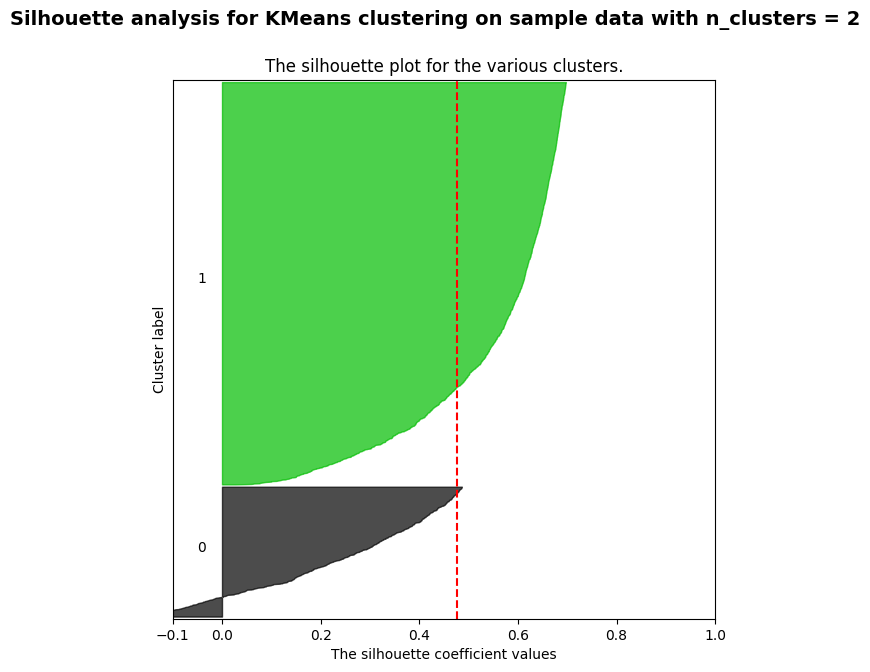

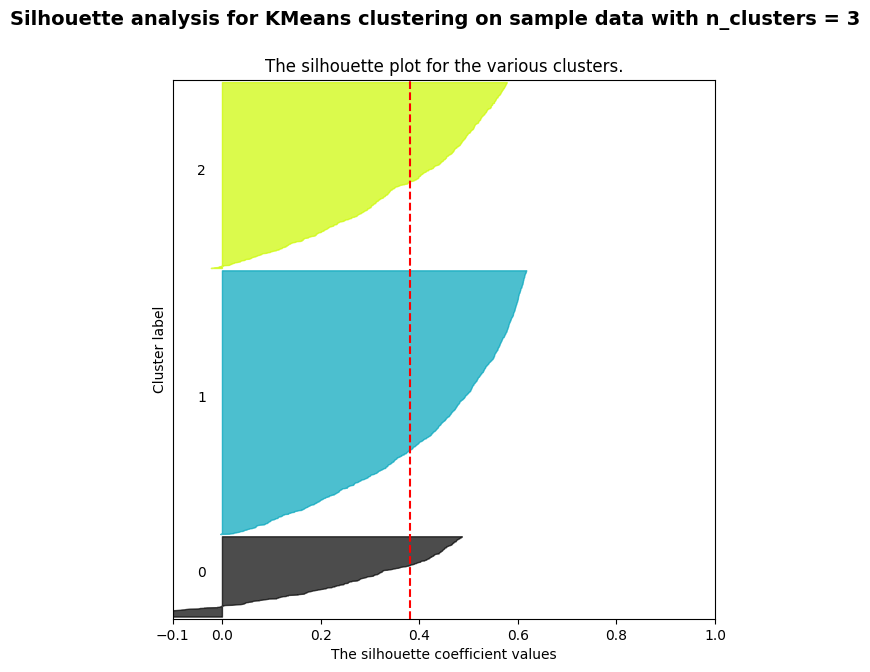

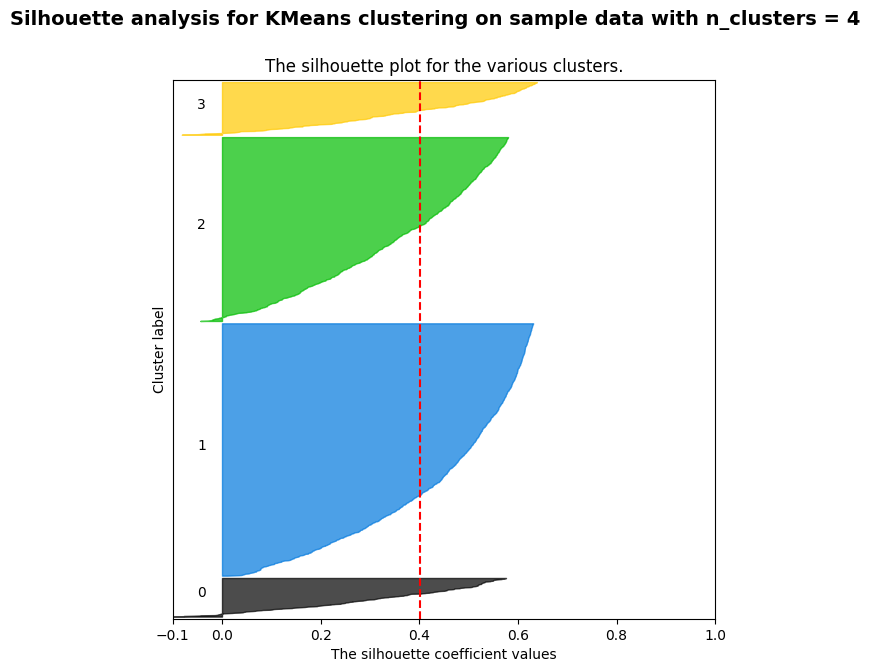

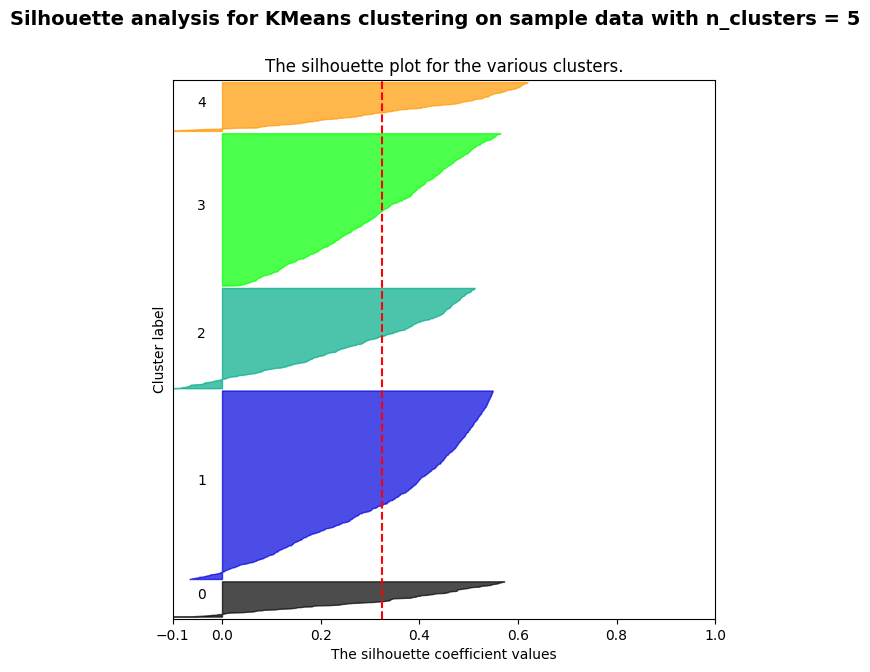

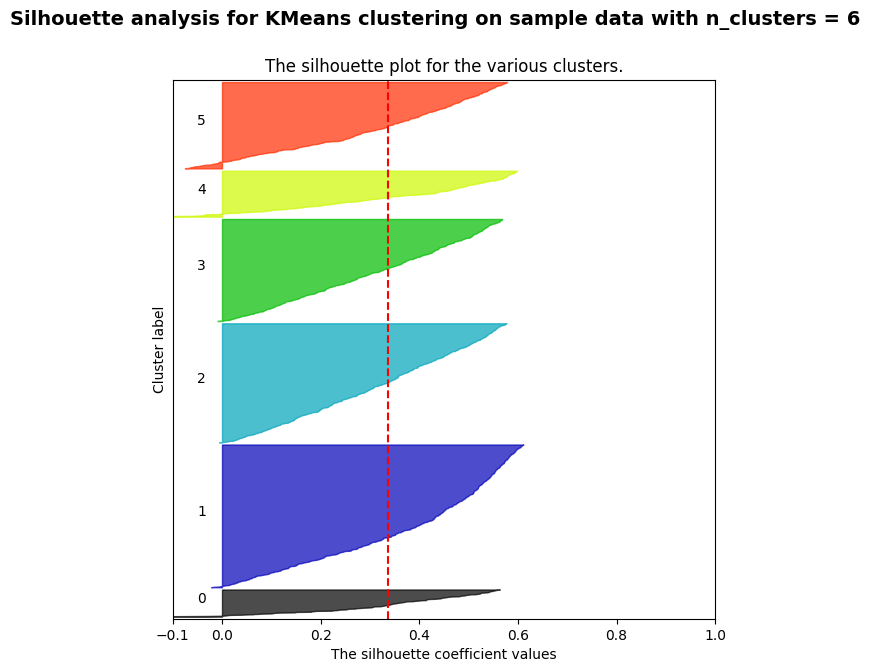

In [54]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = range(2, 7)
X = two_features_log10
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


plt.show()

**Exercise 1.2** Try to find out the optimal number of clusters [Caliński-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index). (assuming $k \in [2,7]$). Find more about the sklearn implementation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html).

In [31]:
from sklearn.metrics import calinski_harabasz_score
test_num = range(2, 7)
for cluster_num in test_num:
  km = KMeans(n_clusters=cluster_num, random_state=10).fit(two_features_log10)
  print(f"the calinski harabasz score for {cluster_num} clusters is: {calinski_harabasz_score(two_features_log10, km.labels_)}")

the calinski harabasz score for 2 clusters is: 1814.5072562569562
the calinski harabasz score for 3 clusters is: 1780.4878147554764
the calinski harabasz score for 4 clusters is: 1925.449088226335
the calinski harabasz score for 5 clusters is: 1787.6101344088052
the calinski harabasz score for 6 clusters is: 1792.986842785166


The real power of clustering algorithms lies in the fact that we don't need to limit ourselves to two dimentions (otherwise, we could just cluster the data using a pencil and a sheet of paper).  
This is because they rely on mathematical distances, such as the Euclidean distance, which typically work for any number of dimentions.  
This way, we can use multiple features to cluster our data set.

**Exercise 2.** Perform a k-means clustering on `three_features_log10` with a selected number of clusters and visualize the resuls on an area vs income scatter plot and on a population vs income plot.  
Can you see the differences between this and the previous k-means clustering?

In [55]:
def plot_for_n_clusters(n, X, labels):
  km_2=KMeans(n_clusters=n, random_state=0, n_init="auto").fit(X)
  #pl.plot?
  plot1=px.scatter(three_features_log10,x="2020area",y="2020income",color=labels, opacity=0.5)
  plot1.show()
  plot1=px.scatter(three_features_log10,x="2020pop",y="2020income",color=labels, opacity=0.5)
  plot1.show()

  plot1=px.scatter_3d(three_features_log10,x="2020area",y="2020income",z="2020pop",color=labels, opacity=0.5)
  plot1.show()
plot_for_n_clusters(8, three_features_log10, km_2.labels_)

**Exercise 2.1** Try to find out the optimal number of clusters using Silhouette measure and Caliński-Harabasz index.

In [49]:
# Harabasz index is the highest for n = 4 thus thats the best possible autcome
plot_for_n_clusters(4, three_features_log10, km_2.labels_)
# On the other hand the silhouette average is best for n = 2 but the second best is n = 4
plot_for_n_clusters(2, three_features_log10, km_2.labels_)

In [ ]:
# Put your code here


## Hierarchical clustering

A much different approach to clustering is the *hierarchical clustering*, in which we create a tree (called a *dendrogram*) that represents similarity between points and between clusters.  
In the lecture, you will learn more about the single-linkage and the average-linkage algorithms. In this class, we will use another type of linkage, the Ward linkage. The word *linkage* refers to the method of computing distance between clusters.  

The scikit-learn library does not have methods to visualize dendrograms. Therefore, we will use methods from the `scipy` package.  
First, we perform the clustering using the `hierarchy.linkage` method, and then we visualize it using `hierarchy.dendrogram`.  

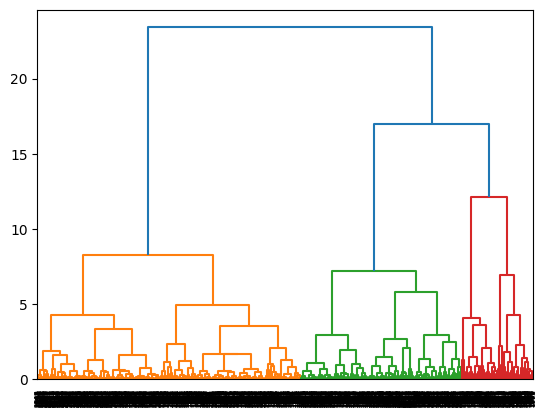

In [38]:
scipy_clustering = hierarchy.linkage(two_features_log10, method='ward')
dendrogram = hierarchy.dendrogram(scipy_clustering)

The branch lengths above represnt the distances between clusters and allows us to decide on the final number of clusters. For example, if we cut the dendrogram at the height of 15 on the plot above, we get three clusters - represented as the green, red, and cyan subtree.   

**Exercise 3.** Decide on the number of clusters based on the dendrogram. Next, perform hierarchical clustering with the Ward linkage using the `AgglomerativeClustering` function from scikit-learn (imported at the beginning of this notebook).  
You can find documentation and usage examples [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).  
Visualize the results on a scatter plot. How do they compare to the k-means ones? Which do you prefer?  
**Homework:** Check the results for a different affinity (measuring the distance between points) and linkage (measuring the distance between clusters).   

In [60]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Define linkage types and affinity types
linkages = ["complete", "ward", "average", "single"]
affinities = ["euclidean", "manhattan", "cosine"]

# Create subplot layout
fig = make_subplots(rows=len(affinities), cols=len(linkages),
                    subplot_titles=[f"{l}-{a}" for a in affinities for l in linkages],
                    specs=[[{'type': 'scatter3d'}]*len(linkages)]*len(affinities))

# Apply clustering for each combination of linkage and affinity method and plot
for row, affinity in enumerate(affinities):
    for col, linkage in enumerate(linkages):
        if linkage == "ward" and affinity != "euclidean":
            continue  # Ward only supports Euclidean distance
        print(f"linkage:{linkage}, affinity:{affinity} ")
        clusters = AgglomerativeClustering(n_clusters=4, linkage=linkage).fit(three_features_log10)
        three_features_log10['cluster'] = clusters.labels_

        # Create 3D scatter plot
        scatter = px.scatter_3d(three_features_log10, x="2020area", y="2020income", z="2020pop",
                                color=three_features_log10['cluster'].astype(str), opacity=0.5)

        # Add traces to the subplot
        for trace in scatter.data:
            fig.add_trace(trace, row=row+1, col=col+1)

# Update layout
fig.update_layout(title_text="Agglomerative Clustering with Different Linkages and Affinities", showlegend=False, height=1200, width=2000)
fig.show()

fig.show()


Output hidden; open in https://colab.research.google.com to view.

**Exercise 4 - homework.** Perform a hierarchical clustering with the selected number of clusters, affinity, and linkage method on the `three_features_log10` data frame.  
Visualize the results on an area vs income scatter plot, and on a population vs income plot.  

In [51]:

clusters = AgglomerativeClustering(n_clusters=4).fit(three_features_log10)
plot1=px.scatter_3d(three_features_log10,x="2020area",y="2020income",z="2020pop",color=clusters.labels_, opacity=0.5)
plot1.show()



[0 2 1 ... 0 0 2]


## Summary

Things to memorize:

- Clustering is a method of grouping points. It can be used to decrease the size of the data set or to detect intresting features without knowing what those features correspond to (*unsupervised learning*).
- Further analyses are needed to understand the real-life meaning of clusters, e.g. what types of municipalities fall into cluster 1 and why.  
- There is no "best" clustering algorithm. Each algorithm performs well for some data sets and poorly for others. It's important to understand how the algorithms work to select the appropriate method for a given data set.  
- There is no "best" clustering for a given data set, but some are obviously bad. You have to choose one that's "good enough".
- The k-means algorithm requires the user to specify the number of clusters before the analysis and produces clusters with similar size and shape.  
- Hierarchical clustering allows to select the number of clusters in a more informed way and can produce clusters of different size and shape, but can be more computationally demanding than k-means. There are many different ways to calculate the similarity between clusters that give different results.

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>